In [3]:
import pandas as pd

df = pd.read_csv('labelling/text_quality_labelling.csv', header=0)
# delete the last row
df = df[:-1]
df['dataset'] = df['state_filename'].apply(lambda x: 'Internal' if 'state_2022' in x else 'ThirdParty')

In [4]:
# convert 'O' -> True, 'X' -> False
df = df.replace({'O': True, 'X': False})
df

,index,app_name,state_filename,textfield_id,category_matching,llm_base,droidfiller-reasoning,droidfiller-functioncall,droidfiller,dataset
0,1.0,org.koitharu.kotatsu,state_-1399196902,searchView_198_119,True,True,True,True,True,ThirdParty
1,2.0,AOL_News_Mail_Video_v6.47.2,state_-2077864795,search_edit_text_182_66,True,True,False,True,True,ThirdParty
2,3.0,de.kromke.andreas.opus1musicplayer,state_1643267838,search_src_text_111_71,True,True,True,True,True,ThirdParty
3,4.0,Petal_Maps‚ÄìGPS_Navigation_v2.5.0.303(002),state_-1677063389,search_src_text_174_1600,True,True,True,True,True,ThirdParty
4,5.0,AutoScout24_Buy_sell_cars,state_1694299268,textinput_filter_edittext_188_301,True,True,True,True,True,ThirdParty
...,...,...,...,...,...,...,...,...,...,...
115,127.0,Clock,state_2022-11-01_184421020236,worldclock_search_map_txt_find_158_140,True,True,True,True,True,Internal
116,128.0,Clock,state_2022-11-01_184455299444,hour_48_1787,False,True,True,True,True,Internal
117,129.0,Clock,state_2022-11-01_184455299444,minute_201_1787,False,True,True,True,True,Internal
118,130.0,Clock,state_2022-11-01_184455299444,second_354_1787,False,True,True,True,True,Internal


In [5]:
df[df['dataset'] == 'Internal'].app_name.unique().tolist()

['Settings',
 'GalaxyStore',
 'SmartThings',
 'Messages',
 'Calendar',
 'Gallery',
 'Contacts',
 'SamsungMembers',
 'MyFiles',
 'SamsungInternet',
 'Clock']

In [6]:
results = [] 

results.append({
    'Technique': 'DroidFilller',
    'dataset': 'Internal',
    'num_true': df[(df['dataset'] == 'Internal') & (df['droidfiller'] == True)].shape[0],
})

results.append({
    'Technique': 'DroidFilller',
    'dataset': 'ThirdParty',
    'num_true': df[(df['dataset'] == 'ThirdParty') & (df['droidfiller'] == True)].shape[0],
})

results.append({
    'Technique': 'LLM_Base',
    'dataset': 'Internal',
    'num_true': df[(df['dataset'] == 'Internal') & (df['llm_base'] == True)].shape[0],
})

results.append({
    'Technique': 'LLM_Base',
    'dataset': 'ThirdParty',
    'num_true': df[(df['dataset'] == 'ThirdParty') & (df['llm_base'] == True)].shape[0],
})

results.append({
    'Technique': 'CategoryMatching',
    'dataset': 'Internal',
    'num_true': df[(df['dataset'] == 'Internal') & (df['category_matching'] == True)].shape[0],
})

results.append({
    'Technique': 'CategoryMatching',
    'dataset': 'ThirdParty',
    'num_true': df[(df['dataset'] == 'ThirdParty') & (df['category_matching'] == True)].shape[0],
})

eval_df = pd.DataFrame(results)
eval_df

,Technique,dataset,num_true
0,DroidFilller,Internal,39
1,DroidFilller,ThirdParty,79
2,LLM_Base,Internal,33
3,LLM_Base,ThirdParty,78
4,CategoryMatching,Internal,22
5,CategoryMatching,ThirdParty,56


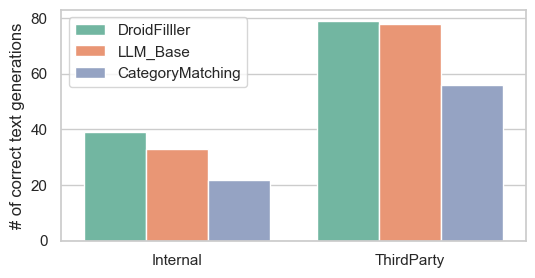

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))

# bigger font 
sns.set(font_scale=2)

sns.set_theme(style="whitegrid")

# pretty palette
ax = sns.barplot(x="dataset", y="num_true", hue="Technique", data=eval_df, palette="Set2")
# ax.set_title('Comparison on Realistic Text Generation', fontsize=15)
ax.set_xlabel('')
ax.set_ylabel('# of correct text generations')

# remove legend title
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, title='')

# save figure
plt.savefig('/Users/greenmon/Dropbox/COINSE/DroidFiller/figures/RQ1_text_quality.pdf', bbox_inches='tight')